### Codio Activity 9.3: A First Look at the `Ridge` regression model

**Expected Time: 45 Minutes**

**Total Points: 30**

This assignment introduces the `Ridge` regression estimator from scikit-learn.  You will revisit the insurance data from the previous assignment and experiment with varying the `alpha` parameter discussed in Video 9.4. Your work here is a basic introduction where complexity in the preprocessing steps will be added to scale your data.  For now, you are just to familiarize yourself with the `Ridge` regression estimator and its `alpha` parameter. 

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### The Data: Insurance

Below the insurance data is loaded as train and test data with the cubic polynomial features created already.  Similarly, the transformed target feature is attached. 

In [33]:
train_df = pd.read_csv('data/train_cubic.csv')
test_df = pd.read_csv('data/test_cubic.csv')

In [34]:
train_df.head()

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,target_log
0,61.0,31.160,0.0,3721.0,1900.760,0.0,970.945600,0.00,0.0,226981.0,115946.360,0.0,59227.681600,0.0,0.0,30254.664896,0.0000,0.00,0.0,9.505249
1,46.0,27.600,0.0,2116.0,1269.600,0.0,761.760000,0.00,0.0,97336.0,58401.600,0.0,35040.960000,0.0,0.0,21024.576000,0.0000,0.00,0.0,10.110666
2,54.0,31.900,3.0,2916.0,1722.600,162.0,1017.610000,95.70,9.0,157464.0,93020.400,8748.0,54950.940000,5167.8,486.0,32461.759000,3052.8300,287.10,27.0,10.215511
3,55.0,30.685,0.0,3025.0,1687.675,0.0,941.569225,0.00,0.0,166375.0,92822.125,0.0,51786.307375,0.0,0.0,28892.051669,0.0000,0.00,0.0,10.652653
4,25.0,45.540,2.0,625.0,1138.500,50.0,2073.891600,91.08,4.0,15625.0,28462.500,1250.0,51847.290000,2277.0,100.0,94445.023464,4147.7832,182.16,8.0,10.648117


In [35]:
test_df.head()

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,target_log
0,45.0,25.175,2.0,2025.0,1132.875,90.0,633.780625,50.350,4.0,91125.0,50979.375,4050.0,28520.128125,2265.75,180.0,15955.427234,1267.561250,100.700,8.0,9.115598
1,36.0,30.020,0.0,1296.0,1080.720,0.0,901.200400,0.000,0.0,46656.0,38905.920,0.0,32443.214400,0.00,0.0,27054.036008,0.000000,0.000,0.0,8.570388
2,64.0,26.885,0.0,4096.0,1720.640,0.0,722.803225,0.000,0.0,262144.0,110120.960,0.0,46259.406400,0.00,0.0,19432.564704,0.000000,0.000,0.0,10.286434
3,46.0,25.745,3.0,2116.0,1184.270,138.0,662.805025,77.235,9.0,97336.0,54476.420,6348.0,30489.031150,3552.81,414.0,17063.915369,1988.415075,231.705,27.0,9.138081
4,19.0,31.920,0.0,361.0,606.480,0.0,1018.886400,0.000,0.0,6859.0,11523.120,0.0,19358.841600,0.00,0.0,32522.853888,0.000000,0.000,0.0,10.426774


### Problem 1

#### Train and Test data

**5 Points**

Split the data into `X_train`, `X_test`, `y_train` and `y_test` using `train_df` and `test_df`.   Assign these as DataFrame and Series objects respectively.

In [36]:
### GRADED
target_feature = "target_log"
(X_train, X_test, y_train, y_test) = (
    train_df.drop(columns=target_feature),
    test_df.drop(columns=target_feature),
    train_df[target_feature], test_df[target_feature])

# Answer check
print(type(X_train))
print(type(y_train))
display(X_train.head(5))
# display(y_train)
# display(X_test)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3
0,61.0,31.160,0.0,3721.0,1900.760,0.0,970.945600,0.00,0.0,226981.0,115946.360,0.0,59227.681600,0.0,0.0,30254.664896,0.0000,0.00,0.0
1,46.0,27.600,0.0,2116.0,1269.600,0.0,761.760000,0.00,0.0,97336.0,58401.600,0.0,35040.960000,0.0,0.0,21024.576000,0.0000,0.00,0.0
2,54.0,31.900,3.0,2916.0,1722.600,162.0,1017.610000,95.70,9.0,157464.0,93020.400,8748.0,54950.940000,5167.8,486.0,32461.759000,3052.8300,287.10,27.0
3,55.0,30.685,0.0,3025.0,1687.675,0.0,941.569225,0.00,0.0,166375.0,92822.125,0.0,51786.307375,0.0,0.0,28892.051669,0.0000,0.00,0.0
4,25.0,45.540,2.0,625.0,1138.500,50.0,2073.891600,91.08,4.0,15625.0,28462.500,1250.0,51847.290000,2277.0,100.0,94445.023464,4147.7832,182.16,8.0


### Problem 2

#### Default `Ridge` model

**10 Points**

Now, use the `Ridge` regressor with default settings to build your first model.  After fitting the model, assign the model coefficients as an array to `model_1_coefs` below.  

In [37]:
### GRADED

model_1 = Ridge()
model_1_coefs = model_1.fit(X_train, y_train).coef_

# Answer check
print(f'Ridge Coefs: {np.round(model_1_coefs, 2)}')

Ridge Coefs: [ 0.12 -0.04  0.67 -0.   -0.   -0.03  0.   -0.02  0.18  0.   -0.    0.
  0.   -0.    0.   -0.    0.   -0.   -0.02]


### Problem 3

#### Exploring different `alpha` values

**10 Points**

Below, a list of alpha values is given to you. Use this list of alphas to create different ridge models, and append the coefficients as a list to `coef_list` below.  

In [38]:
alphas = [0.001, 1.0, 10.0, 100.0]

In [39]:
### GRADED
coef_list = [Ridge(alpha=alpha).fit(X_train, y_train).coef_ for alpha in alphas]

# Answer check
len(coef_list)
print('For alpha = 100 we have the following coefficients:')
list(zip(X_train.columns, coef_list[-1]))

For alpha = 100 we have the following coefficients:


[('age', 0.05799556061903649),
 ('bmi', -0.018572771297980843),
 ('children', 0.02488114710602633),
 ('age^2', -6.48582288931546e-05),
 ('age bmi', -0.0005377264952377842),
 ('age children', -0.012800295220730716),
 ('bmi^2', 0.0019230813061402818),
 ('bmi children', 0.017812477462326087),
 ('children^2', 0.07550312112716355),
 ('age^3', 1.2197374179704669e-06),
 ('age^2 bmi', -1.305801343680391e-05),
 ('age^2 children', 0.00025991145849302175),
 ('age bmi^2', 2.488210345244732e-05),
 ('age bmi children', -0.0004527793675625236),
 ('age children^2', 0.0010564893732867937),
 ('bmi^3', -3.621089705724554e-05),
 ('bmi^2 children', 0.00012912466795282057),
 ('bmi children^2', -0.002579667155719841),
 ('children^3', -0.009769612804031453)]

### Problem 4

#### Exploring the coefficient for `children`

**5 Points**

To see the effect of varying alpha, you are to focus on the coefficients of the `children` feature.  Assign those values as a list to `child_coefs` below, building models on the given list of alphas.   

In general, as you increase `alpha` what happens to the value of the coefficient -- `increase`, `decrease`, or `neither`?  Assign your answer as a string to `ans4` below. 


<class 'list'>
decrease


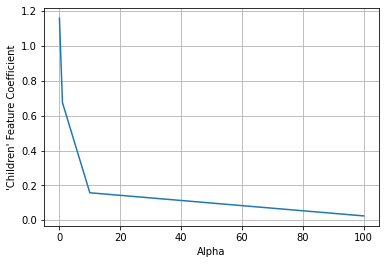

In [40]:
### GRADED

child_coefs = [Ridge(alpha=alpha).fit(X_train, y_train).coef_[2] for alpha in alphas]
plt.plot(alphas, child_coefs)
plt.grid()
plt.xlabel("Alpha")
plt.ylabel("'Children' Feature Coefficient")
ans4 = "decrease"

print(type(child_coefs))
print(ans4)